In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [5]:
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False) 
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# Accessing basic information
print("Data shape:", mnist.data.shape)
print("Target shape:", mnist.target.shape)

Data shape: (70000, 784)
Target shape: (70000,)


In [4]:
# Checking for missing values
missing_values = np.isnan(mnist.data).sum()

if missing_values == 0:
    print("No missing values found in the MNIST dataset.")
else:
    print("There are", missing_values, "missing values in the MNIST dataset.")

No missing values found in the MNIST dataset.


In [9]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8) 

# Split the data into training and testing sets (already split?)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

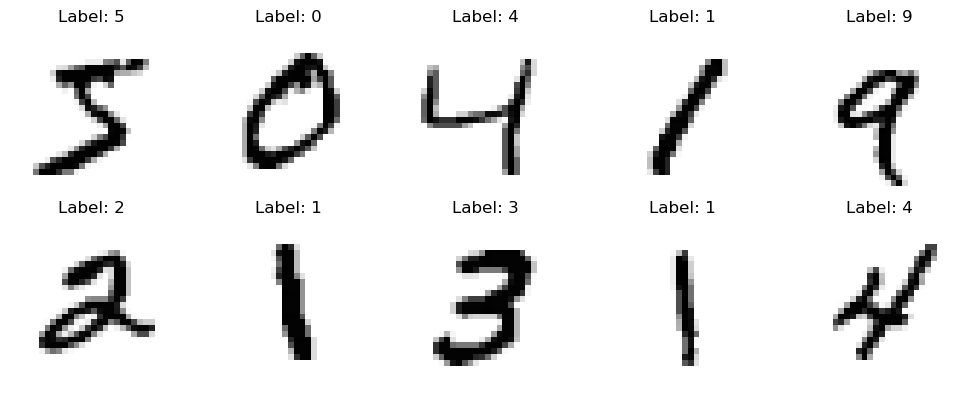

In [11]:
# Plotting the first 10 images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    inverted_image = 1 - X[i].reshape(28, 28)  # Invert the colors
    ax.imshow(inverted_image, cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
# Count occurrences of each digit in the train set
train_digit_counts = np.bincount(y_train)

# Calculate total number of samples in the train set
train_total_samples = len(y_train)

# Calculate percentage of each digit in the train set
train_digit_percentages = (train_digit_counts / train_total_samples) * 100

# Print the percentages for the train set
print("Percentage of each digit in the train set:")
for digit, percentage in enumerate(train_digit_percentages):
    print(f"Percentage of digit {digit}: {percentage:.2f}%")

print("")

# Count occurrences of each digit in the test set
test_digit_counts = np.bincount(y_test)

# Calculate total number of samples in the test set
test_total_samples = len(y_test)

# Calculate percentage of each digit in the test set
test_digit_percentages = (test_digit_counts / test_total_samples) * 100

# Print the percentages for the test set
print("Percentage of each digit in the test set:")
for digit, percentage in enumerate(test_digit_percentages):
    print(f"Percentage of digit {digit}: {percentage:.2f}%")

Percentage of each digit in the train set:
Percentage of digit 0: 9.87%
Percentage of digit 1: 11.21%
Percentage of digit 2: 10.04%
Percentage of digit 3: 10.18%
Percentage of digit 4: 9.86%
Percentage of digit 5: 8.96%
Percentage of digit 6: 9.86%
Percentage of digit 7: 10.40%
Percentage of digit 8: 9.76%
Percentage of digit 9: 9.87%

Percentage of each digit in the test set:
Percentage of digit 0: 9.83%
Percentage of digit 1: 11.52%
Percentage of digit 2: 9.67%
Percentage of digit 3: 10.34%
Percentage of digit 4: 9.06%
Percentage of digit 5: 9.37%
Percentage of digit 6: 9.61%
Percentage of digit 7: 10.55%
Percentage of digit 8: 9.69%
Percentage of digit 9: 10.36%


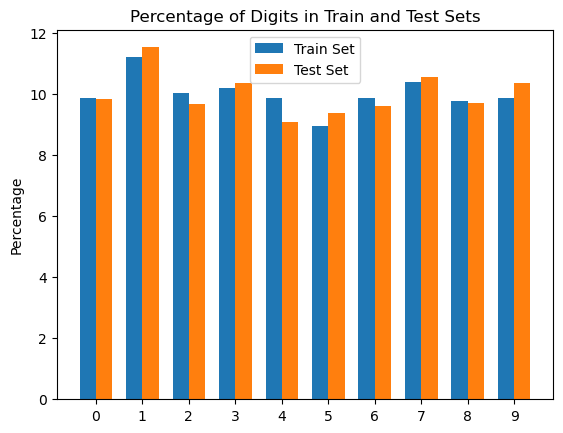

In [13]:
# Plotting
digits = np.arange(10)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(digits - width/2, train_digit_percentages, width, label='Train Set')
rects2 = ax.bar(digits + width/2, test_digit_percentages, width, label='Test Set')

ax.set_ylabel('Percentage')
ax.set_title('Percentage of Digits in Train and Test Sets')
ax.set_xticks(digits)
ax.set_xticklabels(digits)
ax.legend()

plt.show()